In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)

In [2]:
def read_file(file_name):
    province = read_col(file_name, 1, str)
    cases = read_col(file_name, 2, int)
    return province, cases
def read_col(file_name, col, dtype):
    return np.genfromtxt(file_name, delimiter=',', skip_header=1, usecols=col, dtype=dtype)
province, cases = read_file('covid_jpn_prefecture.csv')

In [3]:
province_name = np.unique(province)

In [4]:
cases_sum = []
for i in range(len(province_name)):
    cases_sum.append(np.max(cases[province == province_name[i]]))

In [5]:
k = sorted(zip(cases_sum,province_name), key=lambda x: x[0])
sorted_cases = [k[i][0] for i in range(len(k))]
sorted_name = [k[i][1] for i in range(len(k))]

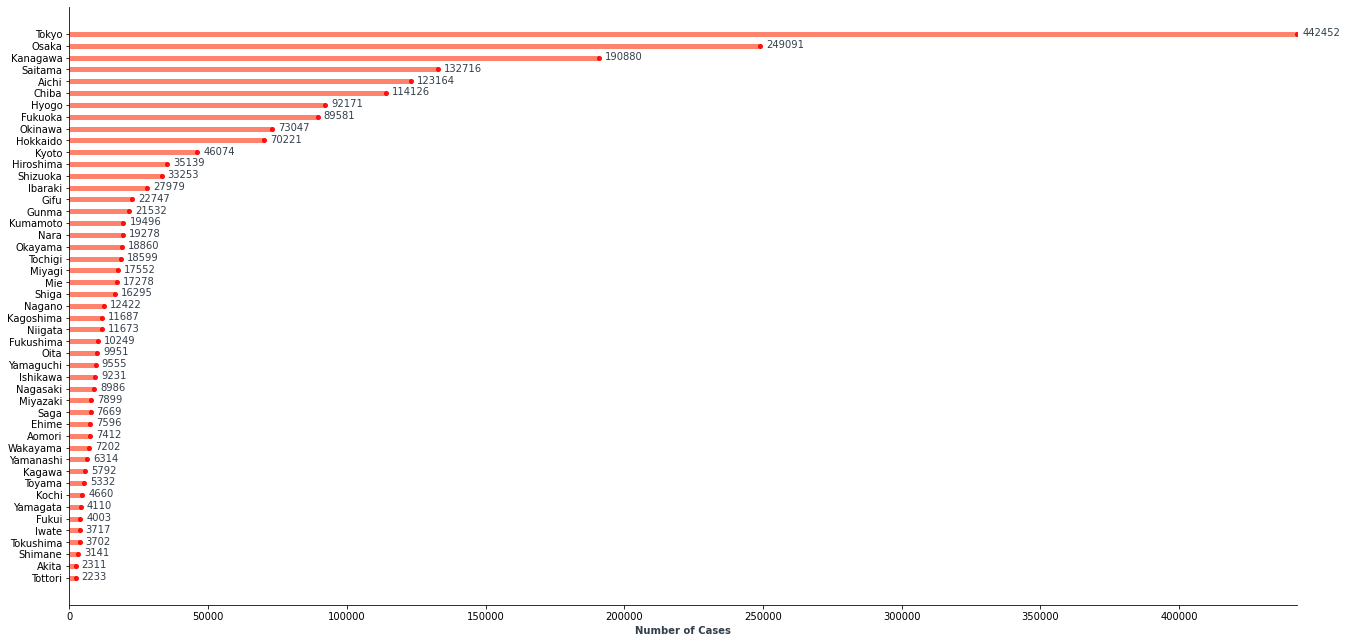

In [10]:
fig, ax = plt.subplots(figsize=(22,11))

my_range = range(len(sorted_name))

#set color
color_bar = 'tomato'
color_marker = 'red'

ax.hlines(y = my_range, xmin = 0, xmax = sorted_cases, color = color_bar, alpha = 0.8, linewidth = 5)

# create for each expense type a dot at the level of the expense percentage value
ax.plot(sorted_cases, my_range, "o", markersize=4, color=color_marker, alpha=0.9)

# set labels
ax.set_xlabel('Number of Cases', fontsize = 10, fontweight='black', color = '#333F4B')
# ax.set_ylabel('')

# Add annotation
# zip joins x and y coordinates in pairs
for x,y in zip(sorted_cases, my_range):

    label = x

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 color = '#333F4B',
                 textcoords = "offset points", # how to position the text
                 xytext = (6,-2), # distance from text to points (x,y)
                 ha = 'left') # 
    
# set axis
ax.tick_params(axis='both', which='major', labelsize = 10)
ax.set_yticks(my_range, sorted_name)
# start, end = ax.get_xlim()
# ax.set_xlim(left = start)
# ax.set_xticks(range(0,2000001,250000), (0, '250k', '500k', '750k', '1M', '1.25M', '1.5M', '1.75M', '2M'))

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# set the spines position
ax.spines['bottom'].set_position(('axes', 0))
ax.spines['left'].set_position(('axes', 0.0))

ax.margins(x=0)

plt.savefig('hist.png', dpi = 100, bbox_inches = 'tight', facecolor='w')

plt.show()